In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 26.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Restart kernel after installs to access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import os
import urllib.request
import sys
import vertexai

from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)

In [ ]:
# Only for Colab environ
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
# Define Google Cloud project info
PROJECT_ID = "nwf-gemini"
LOCATION = "us-central1"

# if not running on colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

In [ ]:
# Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [ ]:
# Load the Gemini 1.0 Pro and Gemini 1.0 Pro Vision Model
text_model = GenerativeModel("gemini-1.0-pro")
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

In [ ]:
if not os.path.exists("utils"):
    os.makedirs("utils")

# download the helper scripts from utils folder
url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")

In [ ]:
from utils.intro_multimodal_rag_utils import get_document_metadata

In [ ]:
pdf_folder_path = "/content/drive/MyDrive/Documentation/RAG"

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image.
"""

# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model,
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
)

print("\n\n --- Completed processing. ---")



 Processing the file: --------------------------------- /content/drive/MyDrive/Documentation/RAG/ClimatePolicyNHV.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/ClimatePolicyNHV.pdf_image_0_0_235.jpeg
Extracting image from page: 1, saved as: images/ClimatePolicyNHV.pdf_image_0_1_239.jpeg
Extracting image from page: 1, saved as: images/ClimatePolicyNHV.pdf_image_0_2_440.jpeg
Processing page: 2
Extracting image from page: 2, saved as: images/ClimatePolicyNHV.pdf_image_1_0_242.jpeg
Processing page: 3
Extracting image from page: 3, saved as: images/ClimatePolicyNHV.pdf_image_2_0_256.jpeg
Extracting image from page: 3, saved as: images/ClimatePolicyNHV.pdf_image_2_1_259.jpeg
Extracting image from page: 3, saved as: images/ClimatePolicyNHV.pdf_image_2_2_260.jpeg
Processing page: 4
Extracting image from page: 4, saved as: images/ClimatePolicyNHV.pdf_image_3_0_263.jpeg
Extracting image from page: 4, saved as: images/ClimatePolicyNHV.pdf_image_3_1_266.jpeg
Processin

In [ ]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,ClimatePolicyNHV.pdf,1,THE GREEN CITY:\nCLIMATE POLICY FOR\nNEW HAVEN...,"[-0.015528383664786816, -0.007834934629499912,...",1,THE GREEN CITY:\nCLIMATE POLICY FOR\nNEW HAVEN...,"[-0.015528383664786816, -0.007834934629499912,..."
1,ClimatePolicyNHV.pdf,2,scientists and engaged citizens have\nknown ab...,"[-0.020567666739225388, -0.006021715234965086,...",1,scientists and engaged citizens have\nknown ab...,"[-0.01293930597603321, 0.0014013428008183837, ..."
2,ClimatePolicyNHV.pdf,2,scientists and engaged citizens have\nknown ab...,"[-0.020567666739225388, -0.006021715234965086,...",2,als and communities as well.\nAlong with decla...,"[-0.007822657003998756, -0.013589126989245415,..."
3,ClimatePolicyNHV.pdf,2,scientists and engaged citizens have\nknown ab...,"[-0.020567666739225388, -0.006021715234965086,...",3,rnment to lead. Every other plan we have is ma...,"[-0.04570014774799347, -0.016144853085279465, ..."
4,ClimatePolicyNHV.pdf,3,Emergency Powers\nBecause of the existing and ...,"[-0.025216635316610336, -0.005749189760535955,...",1,Emergency Powers\nBecause of the existing and ...,"[-0.025216635316610336, -0.005749189760535955,..."


In [ ]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,ClimatePolicyNHV.pdf,1,1,images/ClimatePolicyNHV.pdf_image_0_0_235.jpeg,The image contains a plant stem with five lea...,"[0.0043843626, 0.0426179394, 0.00962506421, 0....","[0.004947717301547527, -0.05290094017982483, -..."
1,ClimatePolicyNHV.pdf,1,2,images/ClimatePolicyNHV.pdf_image_0_1_239.jpeg,The image is a graph showing the results of a...,"[-0.0154675655, 0.0435703024, -0.00590002909, ...","[-0.005736225284636021, -0.04487200081348419, ..."
2,ClimatePolicyNHV.pdf,1,3,images/ClimatePolicyNHV.pdf_image_0_2_440.jpeg,The image shows a college campus with many bu...,"[-0.010813402, 0.048890736, -3.72024551e-05, -...","[0.04442034289240837, -0.06247389689087868, -0..."
3,ClimatePolicyNHV.pdf,2,1,images/ClimatePolicyNHV.pdf_image_1_0_242.jpeg,The image shows a park with a large green law...,"[-0.00010206869, 0.0445401035, 0.00673649833, ...","[0.027602413669228554, -0.04663057625293732, -..."
4,ClimatePolicyNHV.pdf,3,1,images/ClimatePolicyNHV.pdf_image_2_0_256.jpeg,The image is of a college campus in the winte...,"[0.0118815908, 0.045153778, -0.0113713574, -0....","[0.049493882805109024, -0.04749796539545059, -..."


In [ ]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

In [ ]:
query = "Describe the climate policy of New Haven"

In [ ]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(matching_results_text, print_top=False, chunk_text=True)

Citation 1: Matched text: 

score:  0.84
file_name:  ClimatePolicyNHV.pdf
page_number:  1
chunk_number:  1
chunk_text:  THE GREEN CITY:
CLIMATE POLICY FOR
NEW HAVEN
An Imagine Better Brief

Citation 2: Matched text: 

score:  0.76
file_name:  ClimatePolicyNHV.pdf
page_number:  2
chunk_number:  1
chunk_text:  scientists and engaged citizens have
known about the existential threat
represented by global warming and
climate change. In 2019, New Haven
declared a climate emergency. Four
years later, as record after record for
heat and extreme weather are set,
and as the ashes from forest fires
hundreds of miles away arrive in our
lungs, it has become clear that the
climate crisis has arrived, and will
only intensify in the years to come. 
FOR DECADES
Thinking globally,
acting locally
New Haven cannot solve this global crisis on its own. But there is a moral and
practical imperative to respond to this imminent threat through both mitigation
and adaptation efforts. Individual and collective ef

In [ ]:
print("\n **** Result: ***** \n")

# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

instruction = f"""Answer the question with the given context.
Question: {query}
Context: {context}
Answer:
"""

# Prepare the model input
model_input = instruction

# Generate Gemini response with streaming output
get_gemini_response(
    text_model,
    model_input=model_input,
    stream=True,
    generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
)


 **** Result: ***** 



'## New Haven\'s Climate Policy: A Summary\n\nNew Haven\'s climate policy, outlined in "The Green City: Climate Policy for New Haven," focuses on mitigating and adapting to the effects of climate change. The policy recognizes the urgency of the climate crisis and emphasizes the need for immediate action. \n\nHere are the key points of the policy:\n\n**Thinking Globally, Acting Locally:**\n\n* Acknowledges the global nature of the climate crisis but emphasizes the importance of local action.\n* Recognizes the moral and practical imperative to respond to the crisis.\n* Highlights the role of policymakers in reducing fossil fuel use and promoting public health benefits.\n\n**Key Actions:**\n\n* **Divestment from fossil fuels:** Removing investments from fossil fuel companies in pension funds and other investments.\n* **Composting programs:** Building neighborhood and citywide programs to encourage composting of biodegradable waste, reducing methane emissions from landfills.\n* **Green job


 **** Result: ***** 



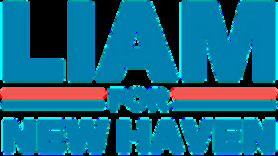

In [ ]:
# Example of searching similar images with text query, but not that accurate as the example pdf file doesn't contain relevant images
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=3,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display(matching_results_image[0]["image_object"])

# Multimodal RAG

In [ ]:
query = """Questions:
 - What specific actions has the New Haven Office of Climate and Sustainability taken since declaring a climate emergency in 2019?
 - How will the use of emergency powers help New Haven address climate change more effectively?
 - What are the expected impacts of expanding the city's tree canopy, particularly in low-income neighborhoods?
 - How does New Haven plan to transition its electric grid to completely renewable energy, and what are the timeframes for this transition?
 - What measures are being taken to enhance public transportation and reduce reliance on personal vehicles in New Haven?
 - How will New Haven ensure that new developments, such as the expansion of Tweed Airport, do not negatively impact the local environment and community health?
 """

In [ ]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=10,
    chunk_text=True,
)

In [ ]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

In [ ]:
# combine all the selected relevant text chunks
context_text = []
for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"])
final_context_text = "\n".join(context_text)

# combine all the relevant images and their description generated by Gemini
context_images = []
for key, value in matching_results_image_fromdescription_data.items():
    context_images.extend(
        ["Image: ", value["image_object"], "Caption: ", value["image_description"]]
    )

In [ ]:
prompt = f""" Instructions: Compare the images and the text provided as Context: to answer multiple Question:
Make sure to think thoroughly before answering the question and put the necessary steps to arrive at the answer in bullet points for easy explainability.
If unsure, respond, "Not enough context to answer".

Context:
 - Text Context:
 {final_context_text}
 - Image Context:
 {context_images}

{query}

Answer:
"""

# Generate Gemini response with streaming output
Markdown(
    get_gemini_response(
        multimodal_model,
        model_input=[prompt],
        stream=True,
        generation_config=GenerationConfig(temperature=0.4, max_output_tokens=2048),
    )
)

1. **What specific actions has the New Haven Office of Climate and Sustainability taken since declaring a climate emergency in 2019?**
 - Created a Climate Task Force to guide its strategy.
 - Implemented ambitious commitments to reduce local carbon emissions.
 - Worked with each part of the city government to implement climate initiatives.

2. **How will the use of emergency powers help New Haven address climate change more effectively?**
 - Fast track changes needed to combat climate change.
 - Combine the energy of local activists, new knowledge of risks and best practices, and the resources and authority of the city government to lead.
 - Make every other plan more certain by addressing climate change as an urgent, systemic priority.

3. **What are the expected impacts of expanding the city's tree canopy, particularly in low-income neighborhoods?**
 - Reduce local carbon emissions.
 - Improve air quality.
 - Increase taxable property in New Haven.

4. **How does New Haven plan to transition its electric grid to completely renewable energy, and what are the timeframes for this transition?**
 - Collect solar energy to speed along this transition.
 - Use all city space possible to collect solar energy.
 - No specific timeframes are provided in the text.

5. **What measures are being taken to enhance public transportation and reduce reliance on personal vehicles in New Haven?**
 - Build infrastructure that encourages mobility alternatives like public transit, cycling, and walking.
 - Explore additional highway removal projects.
 - Remove or reduce I-95 and I-91's footprint within the city limits.

6. **How will New Haven ensure that new developments, such as the expansion of Tweed Airport, do not negatively impact the local environment and community health?**
 - Publicly support an Environmental Impact Statement before any expansion of Tweed Airport occurs.
 - Ensure that the city does not make similar mistakes with the airport as it did with highways, which had significant detrimental effects on the health of residents.

---------------Matched Images------------------



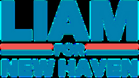

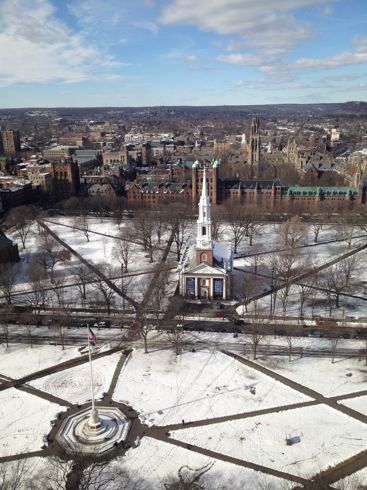

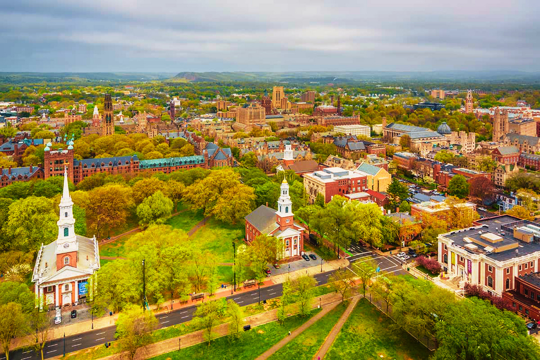

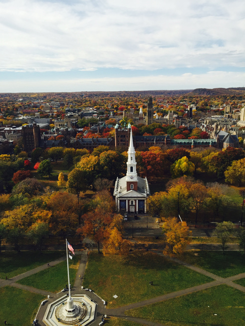

In [ ]:
print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_fromdescription_data[0]["img_path"],
        matching_results_image_fromdescription_data[1]["img_path"],
        matching_results_image_fromdescription_data[2]["img_path"],
        matching_results_image_fromdescription_data[3]["img_path"],
    ],
    resize_ratio=0.5,
)

In [ ]:
# Image citations. Again, as the images on pdf isn't relevant.

print_text_to_image_citation(
    matching_results_image_fromdescription_data, print_top=False
)

Citation 1: Matched image path, page number and page text: 

score:  0.61
file_name:  ClimatePolicyNHV.pdf
path:  images/ClimatePolicyNHV.pdf_image_0_1_239.jpeg
page number:  1
page text:  THE GREEN CITY:
CLIMATE POLICY FOR
NEW HAVEN
An Imagine Better Brief

image description:   The image is a graph showing the results of a poll conducted by the Quinnipiac University Poll. The poll asked respondents who they would vote for in the 2020 Democratic primary in New Haven. The results show that 44% of respondents would vote for Joe Biden, 20% would vote for Elizabeth Warren, 11% would vote for Bernie Sanders, 9% would vote for Pete Buttigieg, and 8% would vote for Amy Klobuchar.
Citation 2: Matched image path, page number and page text: 

score:  0.55
file_name:  ClimatePolicyNHV.pdf
path:  images/ClimatePolicyNHV.pdf_image_2_0_256.jpeg
page number:  3
page text:  Emergency Powers
Because of the existing and increasing possibility of the occurrence of disasters of
unprecedented size and dest

In [ ]:
# Text citations

print_text_to_text_citation(
    matching_results_chunks_data,
    print_top=False,
    chunk_text=True,
)

Citation 1: Matched text: 

score:  0.76
file_name:  ClimatePolicyNHV.pdf
page_number:  2
chunk_number:  1
chunk_text:  scientists and engaged citizens have
known about the existential threat
represented by global warming and
climate change. In 2019, New Haven
declared a climate emergency. Four
years later, as record after record for
heat and extreme weather are set,
and as the ashes from forest fires
hundreds of miles away arrive in our
lungs, it has become clear that the
climate crisis has arrived, and will
only intensify in the years to come. 
FOR DECADES
Thinking globally,
acting locally
New Haven cannot solve this global crisis on its own. But there is a moral and
practical imperative to respond to this imminent threat through both mitigation
and adaptation efforts. Individual and collective efforts will be required, and
policymakers have a crucial role to play. And we now know that reducing the use
of fossil fuels helps not only in the long run, but with immediate public health
b